## Data Loading

In [1]:
# import the library
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset file
tcData = pd.read_csv('data/ToyotaCorolla.csv' ,encoding='latin1')
tcData.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Data Cleaning and Understanding

In [3]:
# shape of the data
print('Dimenssion:', tcData.shape)

Dimenssion: (1436, 38)


In [4]:
# extracting the dataframes as per business problem
# "Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"

df = tcData.iloc[:, np.r_[2:4, 6, 8, 12:14, 15:18]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


* All the features have int64 datatypes (numeric form)
* No categorical feature is found

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [7]:
# null values check
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
# dublicate entry check
print('Dublicate entry counts:', df.duplicated().sum())

Dublicate entry counts: 1


In [9]:
# show all the dublicated entry rows
df.loc[df.duplicated(), :]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


* Yes, data has 1 dublicate entry at the index 113
* We need to remove the dublication of entry

In [10]:
# remove all the dublicate entry
df.drop_duplicates(keep = 'first').shape

(1435, 9)

* Before deletion = 1436
* After deletion = 1435
* Total deletion = 1

## Data Visualization and Explore

In [11]:
# copy the extracted data 'df' into another dataframe 'features' for visualization analysis 
features = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']

# droping out Gears for Outliers analysis
features1 = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']
# Note: If Gears is included for outliers, then the correlation for Gears shows NAN values.

* Note: we are remove the outliers excluding feature 'Gear'.
* Observations: When we are tyring to remove the Gear feature outliers, we get NaN values in the coorelation matrix


* features1[] have all the columns except Gears (it it used for model part)
* features[] have all the columns include Gears (it is used for visualization analysis)

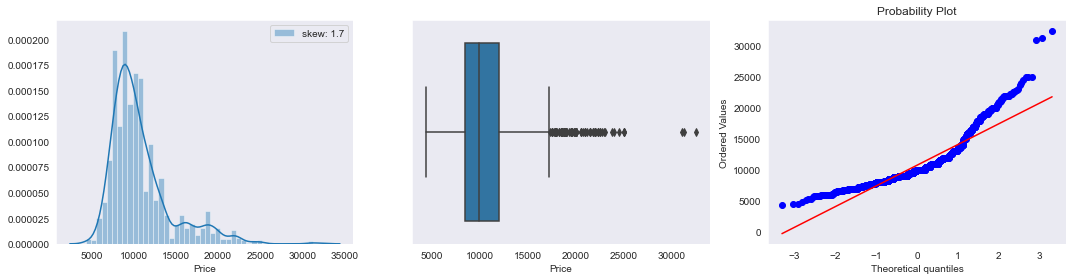

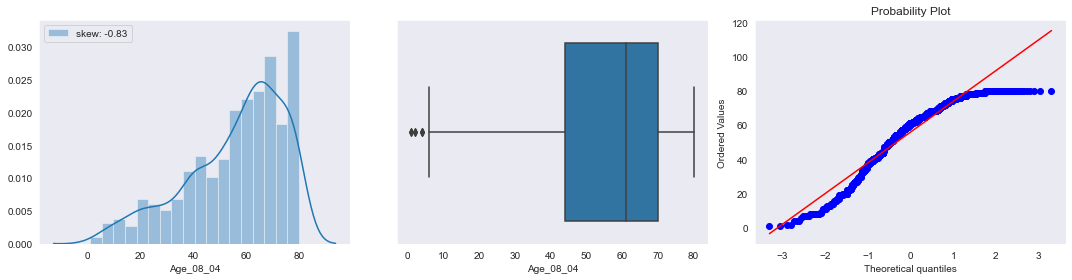

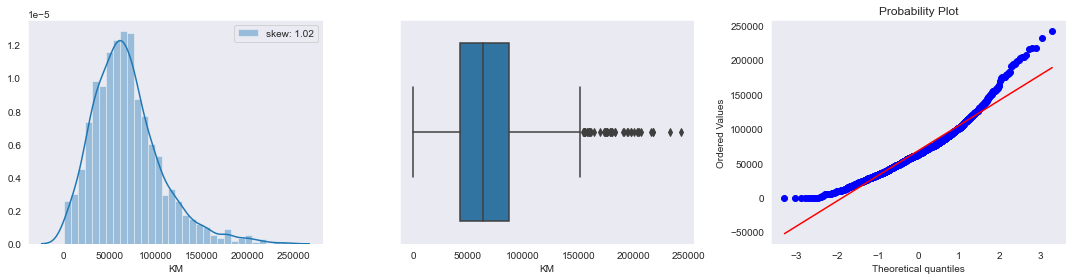

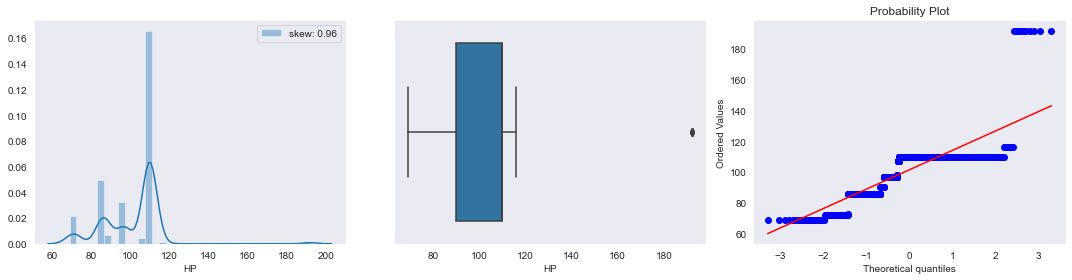

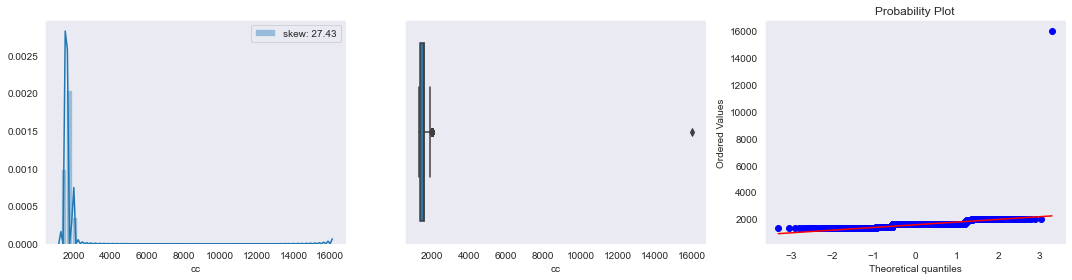

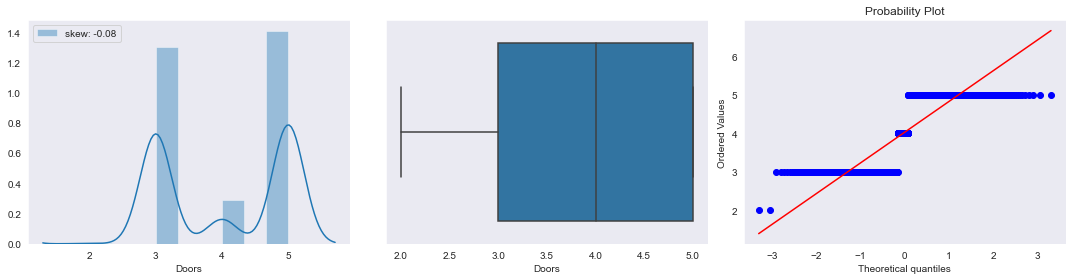

C:\Users\K.K\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


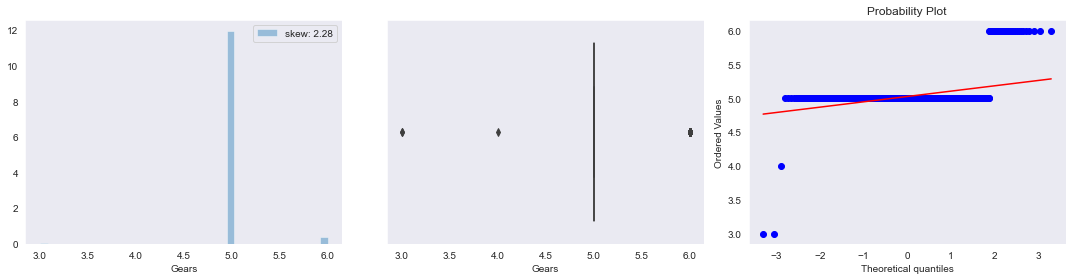

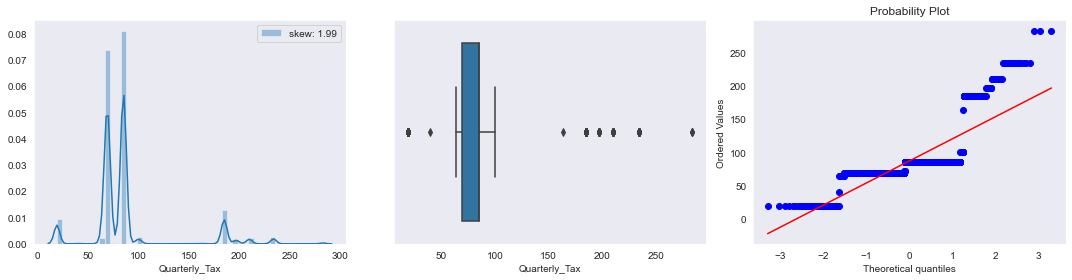

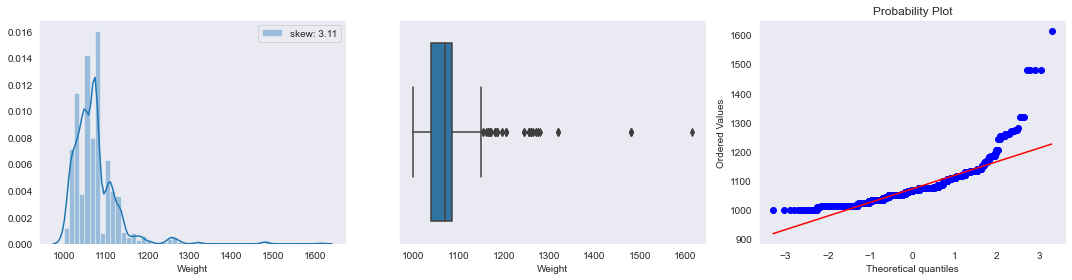

In [12]:
# check the distrinution of data (nature of data), outliers and probability plot
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    
    plt.subplot(132)
    sns.boxplot(df[col])
    
    plt.subplot(133)
    stats.probplot(df[col], plot = plt)
    plt.tight_layout()
    
    plt.show()

* The data is not normally distributed
* By analysing the data, most of the outliers are present in the data
* Also data is in skewed natures format

## Analysis using IQR method
#### Capping using IQR technique

In [13]:
# making copy of extracted features for data processing purpose by capping method
df_cap = df.copy()

In [14]:
# define a function for all the features, so that we reduce the multiple lines of code for each of the features
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper_whisker = Q3 + (factor * IQR)
        lower_whisker = Q1 - (factor * IQR)
        
        df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))
        # (7)              (1)                      (2)            (3)      (4)                      (5)            (6)
        
# (1) df[col] > upper_whisker
#     all the values which are greater than upper_whisker
# (2) upper_whisker
#     all the upper_whisker values
# (3) np.where
#     third parameter again where (used for lower_whisker)
# (4) df[col] < lower_whisker
#     all the values which are lower than lower_whisker
# (5) lower_whisker
#     all the lower_whisker values
# (6) df[col]
#     all the values which are in the normal range (keep as it is values)
# (7) df[col]
#     Assigning all the results into the single dataframe

* Function name: iqr_capping()
* Function parameters: df (coppied data), cols (features columns), factor (default Q factor 1.5)
* Normal data is distributed within 0.25 to 0.75 (50% data)


In [15]:
# function calling by passing data, features, factor
iqr_capping(df_cap, features1, 1.5)

In [16]:
for col in features1:
    print(df[col].size)

1436
1436
1436
1436
1436
1436
1436
1436


* 1436 is total rows on data (checking the record size whether function is impacting the size or not)

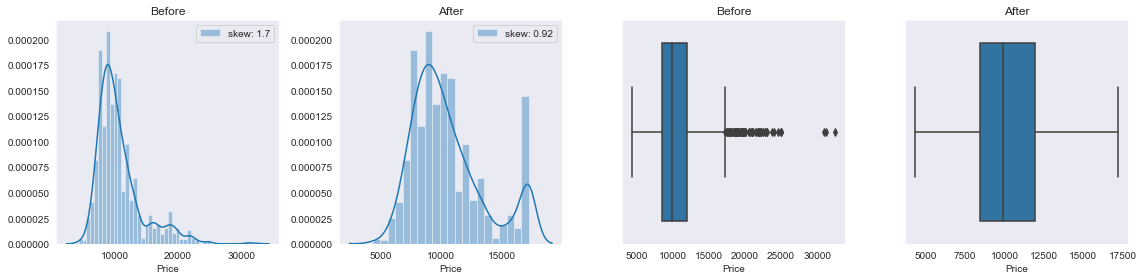

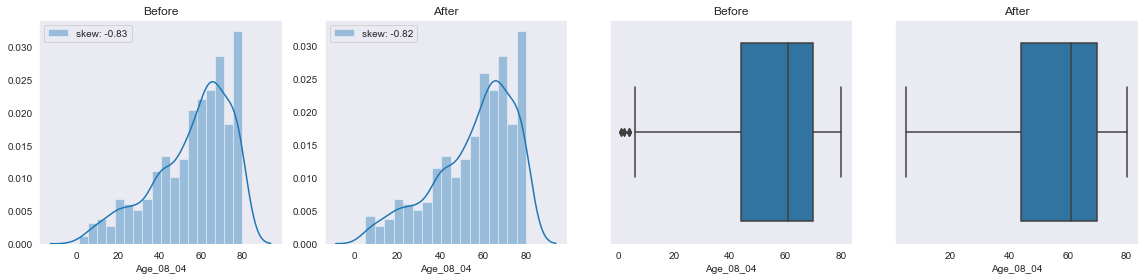

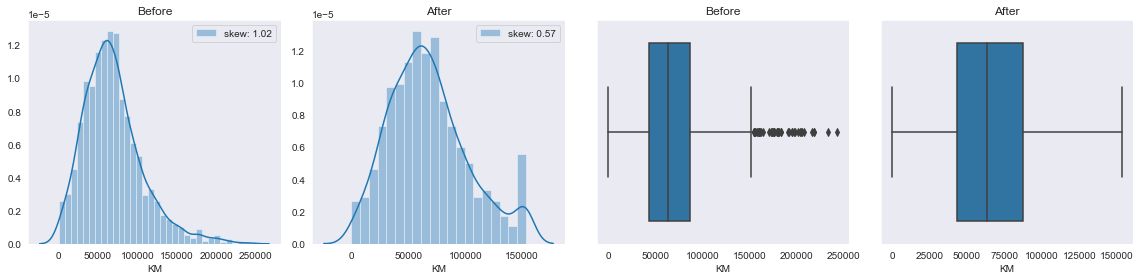

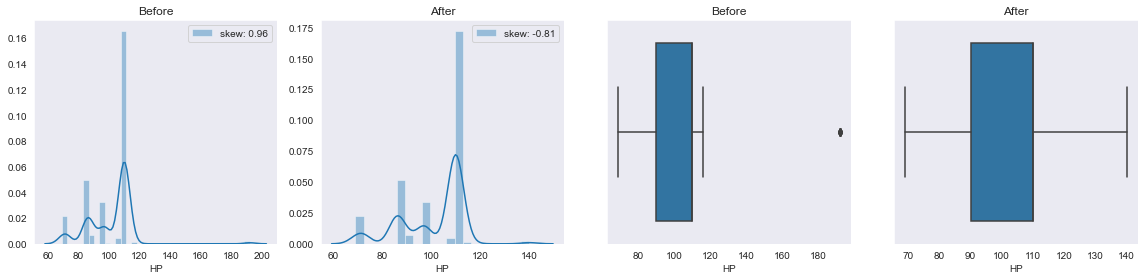

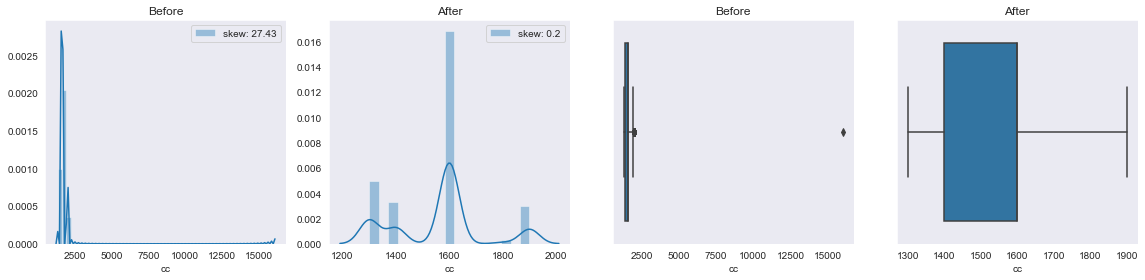

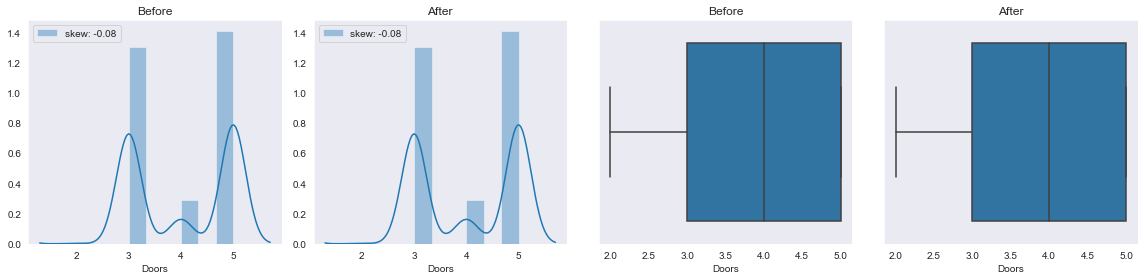

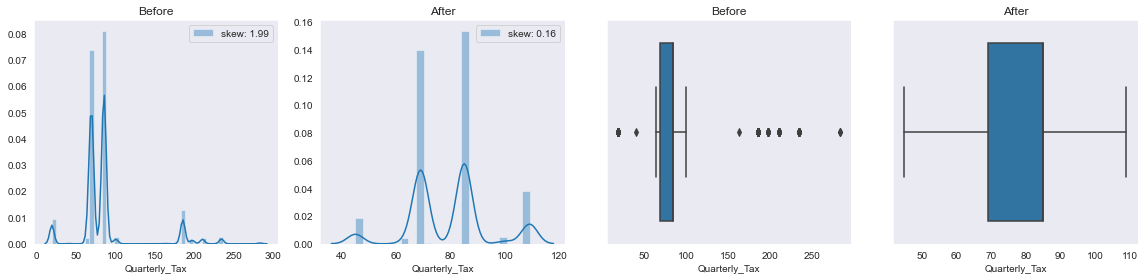

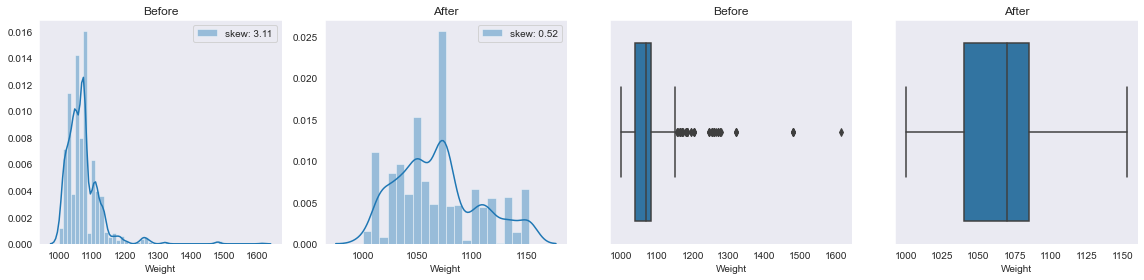

In [17]:
# Analysis the distribution of data and outliers status [After capping technique]
for col in features1:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()
    
# df[col] - original data (before function call)
# df_cap[col] - processed data (after function call)

* More outlier is present in the below features
  
  Price (1.7)
  
  KM (1.02)
  
  cc (27.04)
  
  Quarterly_Tax (1.99)
  
  Weight (3.11)
  
  
* The () indicates skewness

#### trimming using IQR technique

In [18]:
# data copy to trim variable before running a trimimg function
df_trim = df.copy()

In [19]:
# function defination
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper_whisker = Q3 + (factor * IQR)
        lower_whisker = Q1 - (factor * IQR)
        
        originalData = df[col]
        
        indexes = originalData[(originalData > upper_whisker) | (originalData < lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
        
    # return all the indexex that have outliers
    return drop_outliers

In [20]:
# function calling to find the outliers and return the index
dropped = np.unique(iqr_trimming(df_trim, features1, 1.5))

* drooped variable contains all the indexex having outliers

In [21]:
# remove the outliers based on function result (index)
df_trim.drop(dropped, inplace = True)
df_trim.shape

(1106, 9)

* After removing the outliers, total records = 1106

In [22]:
df.shape

(1436, 9)

* Original records = 1436

In [23]:
# Final outlier summary
total_difference = 1436 - 1106
OutlierDeductionRate = 1436 / total_difference
print('Difference in records:', total_difference)
print('Outlier reduction rate:', OutlierDeductionRate)

Difference in records: 330
Outlier reduction rate: 4.351515151515152


* Overall 330 entries found the outliers
* Overall percentage of the data reduction is 43.51 %

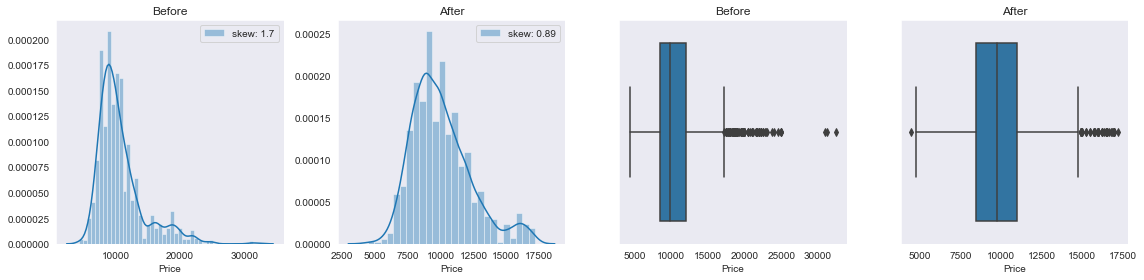

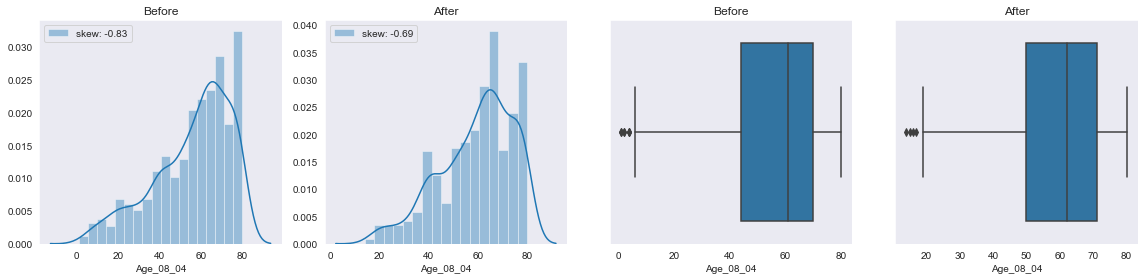

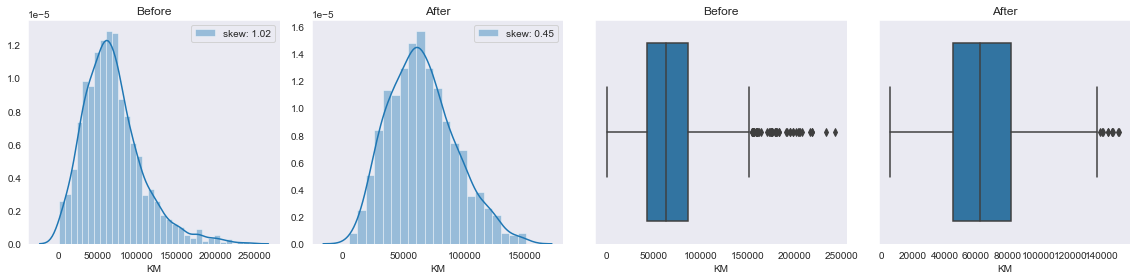

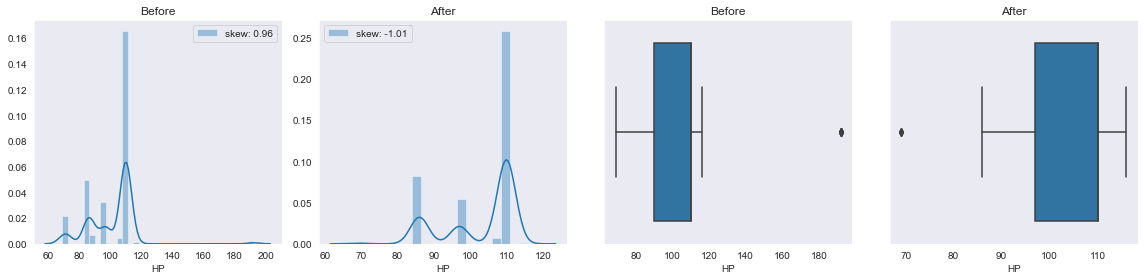

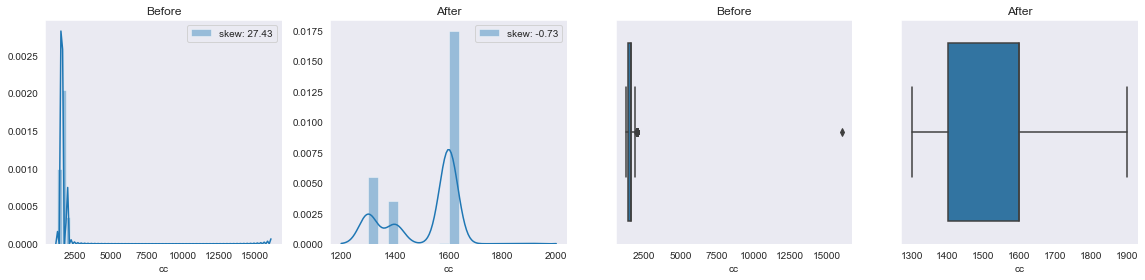

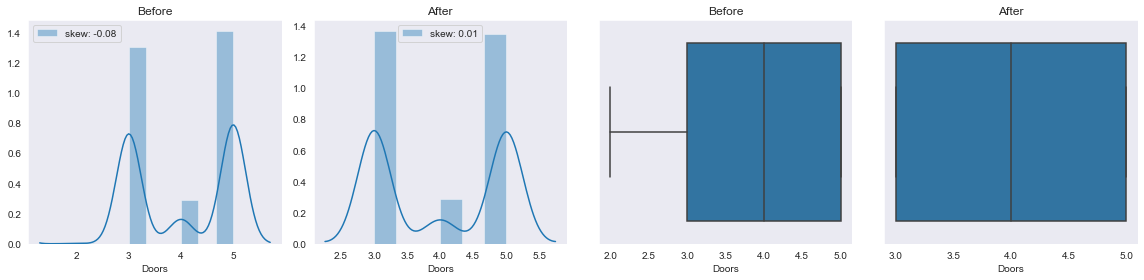

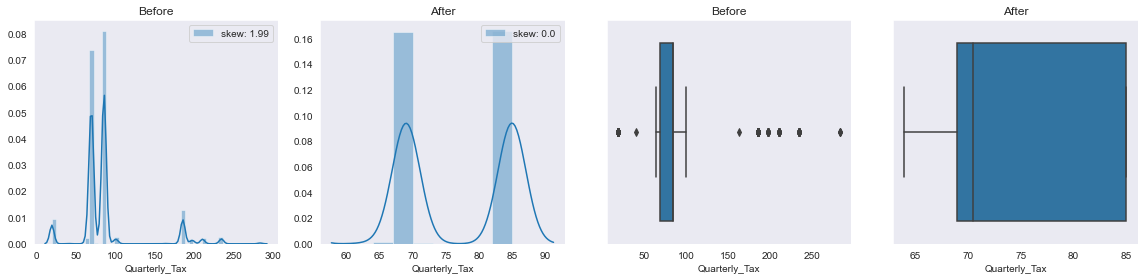

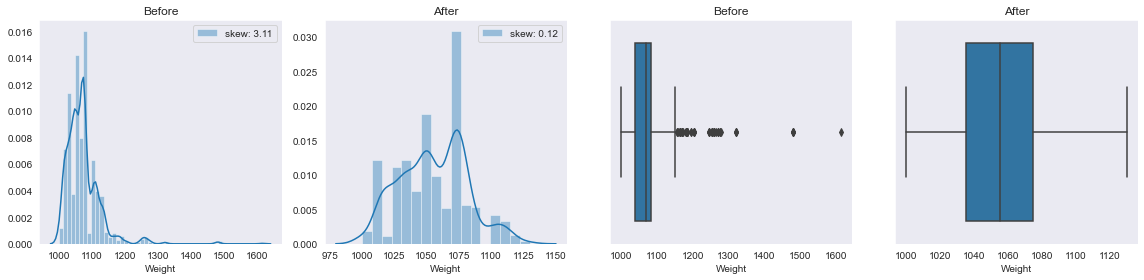

In [24]:
# Analysis the distribution of data and outliers status [After trimming technique]
for col in features1:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

* Almost we are shifted the data skewness to its default state by removal of the outliers

  Price (1.7) -> (0.8)

  KM (1.02) -> (0.43)

  cc (27.04) -> (-0.68)

  Quarterly_Tax (1.99) -> (0.06)

  Weight (3.11) -> (0.14)

Text(0.5, 1.0, 'Coorelation heatmap')

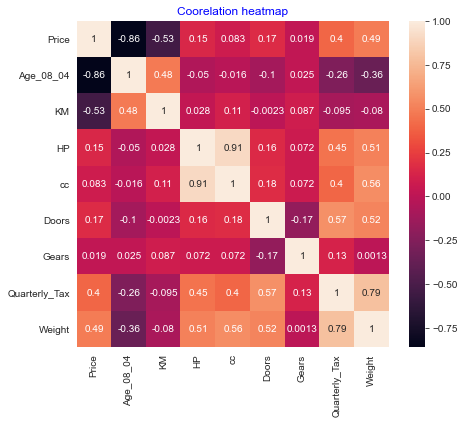

In [25]:
# coorelation matrix
plt.figure(figsize = (7,6))
sns.heatmap(df_trim.corr(), annot = True)
plt.title('Coorelation heatmap', color='blue')

In [26]:
df_trim.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.860177,-0.533743,0.148276,0.082591,0.166323,0.019223,0.399436,0.489721
Age_08_04,-0.860177,1.000000,0.477899,-0.049900,-0.015589,-0.103075,0.025454,-0.258588,-0.356877
KM,-0.533743,0.477899,1.000000,0.027627,0.108159,-0.002264,0.087120,-0.094993,-0.080448
HP,0.148276,-0.049900,0.027627,1.000000,0.908986,0.161454,0.072160,0.454032,0.512650
cc,0.082591,-0.015589,0.108159,0.908986,1.000000,0.177713,0.071518,0.398538,0.560792
Doors,0.166323,-0.103075,-0.002264,0.161454,0.177713,1.000000,-0.172452,0.572070,0.523323
Gears,0.019223,0.025454,0.087120,0.072160,0.071518,-0.172452,1.000000,0.127032,0.001326
Quarterly_Tax,0.399436,-0.258588,-0.094993,0.454032,0.398538,0.572070,0.127032,1.000000,0.794390
Weight,0.489721,-0.356877,-0.080448,0.512650,0.560792,0.523323,0.001326,0.794390,1.000000


- Age and Price are highly negative coorelated (-0.860)
- Quarterly Tax and Weight are moderately positively coorelated (0.794) 

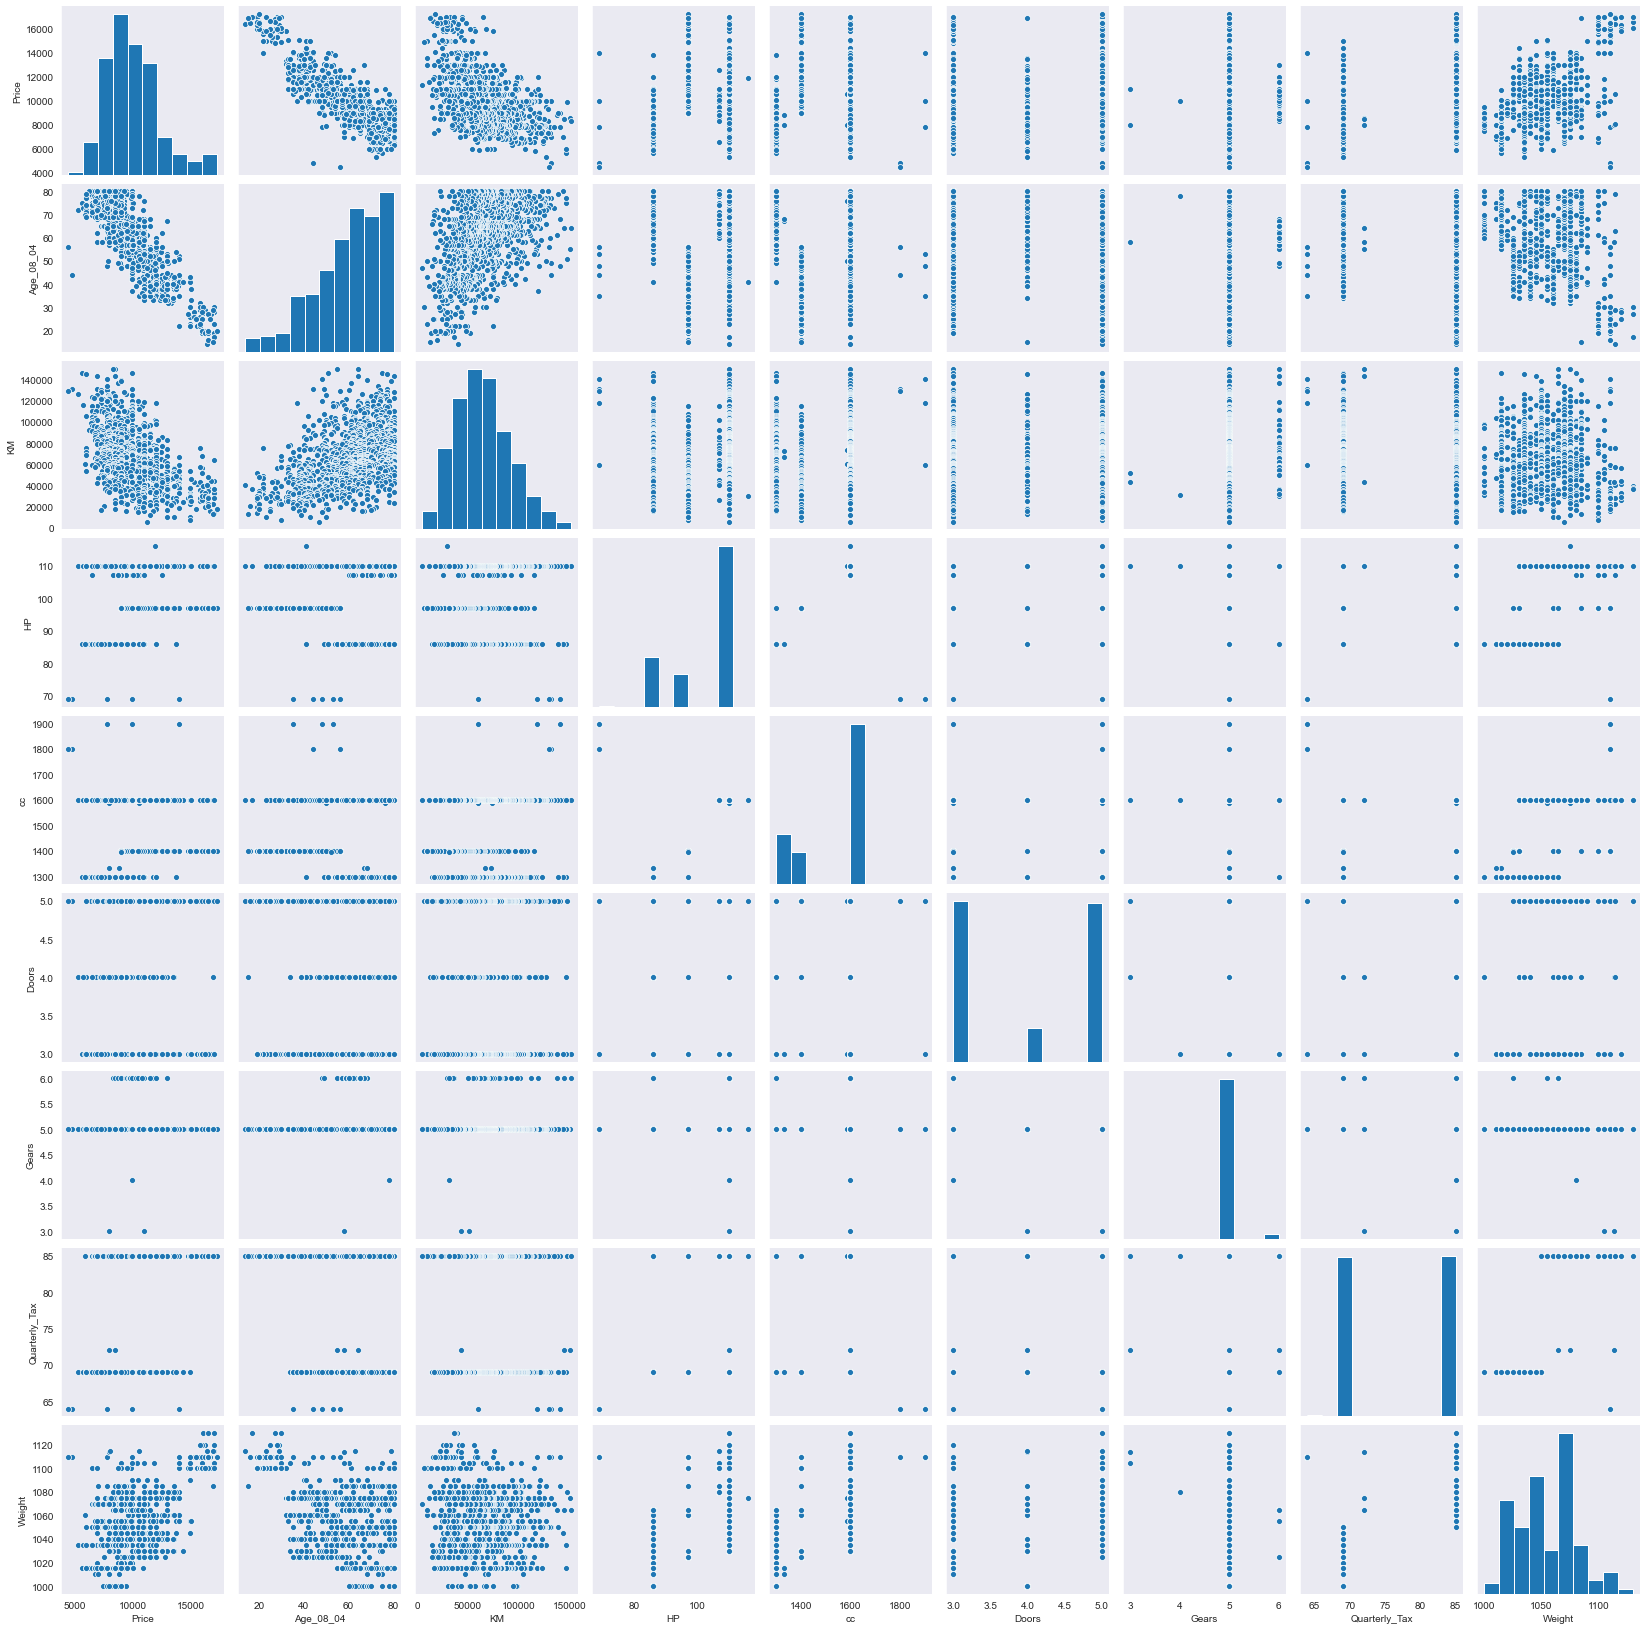

In [27]:
sns.pairplot(df_trim)

## Preparing Models

#### Model 1 (Considering all the features)

In [28]:
model_1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = df_trim).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     615.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:07   Log-Likelihood:                -9167.5
No. Observations:                1106   AIC:                         1.835e+04
Df Residuals:                    1097   BIC:                         1.840e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.041e+04   2202.355     -4.729      0.000   -1.47e+04   -6092.880
Age_08_04      -101.2900      2.438    -41.539      0.000    -106.074     -96.505
KM               -0.0142      0.001    -11.339      0.000      -0.017      -0.012
HP               46.5932      7.619      6.115      0.000      31.643      61.543
cc               -4.5682      0.628     -7.280      0.000      -5.800      -3.337
Doors           -85.8536     40.331     -2.129      0.033    -164.988      -6.719
Gears           552.3847    158.965      3.475      0.001     240.475     864.294
Quarterly_Tax    -0.4014      7.115     -0.056      0.955     -14.363      13.560
Weight           25.6601      2.345     10.944      0.000      21.059      30.261
==============================================================================
Omnibus:                       14.057   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.923
Skew:                           0.019   Prob(JB):                     1.05e-05
Kurtosis:                       3.704   Cond. No.                     5.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1) The Coefficient values of independent features are,

    - The independent feature (Quartely_Tax) = 0.955 , Doors (0.033) and Gears (0.001)
    - All independent features except (cc, Doors, Gears) = 0.000

2) R-squared = 0.818

    - Accuracy = 81.80 %

3) Quartely_Tax is not significant for predicting the Price

    - Because their coefficient value is high than the significant p-value (0.955 > 0.05)

#### Model 2 (Excludeing feature Quartely_Tax)

In [29]:
model_2 = smf.ols('Price ~ Age_08_04 + KM + HP + Doors + cc + Gears + Weight', data = df_trim).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     703.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:08   Log-Likelihood:                -9167.5
No. Observations:                1106   AIC:                         1.835e+04
Df Residuals:                    1098   BIC:                         1.839e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.034e+04   1735.289     -5.957      0.000   -1.37e+04   -6932.883
Age_08_04   -101.3003      2.430    -41.680      0.000    -106.069     -96.531
KM            -0.0141      0.001    -11.360      0.000      -0.017      -0.012
HP            46.4311      7.053      6.583      0.000      32.592      60.271
Doors        -86.6853     37.522     -2.310      0.021    -160.308     -13.062
cc            -4.5555      0.585     -7.783      0.000      -5.704      -3.407
Gears        549.6129    151.111      3.637      0.000     253.113     846.112
Weight        25.5727      1.759     14.541      0.000      22.122      29.023
==============================================================================
Omnibus:                       14.027   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.855
Skew:                           0.019   Prob(JB):                     1.09e-05
Kurtosis:                       3.703   Cond. No.                     4.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1) The Coefficient values of independent features are,

        - The independent feature (Doors) = 0.021
        - All independent features except (Doors) = 0.000
       
2) R-squared = same

    - Accuracy = 81.80 %
    - Adj R squared value is improved

3) Doors is a significant for predicting Price

    - Because their coefficient value is less than the significant p-value (0.021 < 0.05)

## Calculate VIF

In [30]:
# Variance Influance Factor (Multi-collinearity detection)
rsq_price = smf.ols('Price ~ Age_08_04 + KM + HP + Gears + cc + Doors + Gears + Quarterly_Tax + Weight', data = df_trim).fit().rsquared
                    #Age_08_04 + KM + HP + Gears + Quarterly_Tax + Weight', data = df_trim).fit().rsquared
vif_price = 1/(1 - rsq_price)

rsq_km = smf.ols('KM ~ Age_08_04 + Price + HP + Gears + cc + Doors + Gears + Quarterly_Tax + Weight', data = df_trim).fit().rsquared
vif_km = 1/(1 - rsq_km)

rsq_hp = smf.ols('HP ~ Age_08_04 + KM + Price + Gears + cc + Doors + Gears + Quarterly_Tax + Weight', data = df_trim).fit().rsquared
vif_hp = 1/(1 - rsq_hp)

rsq_grs = smf.ols('Gears ~ Age_08_04 + KM + HP + Price + cc + Doors + Quarterly_Tax + Weight', data = df_trim).fit().rsquared
vif_grs = 1/(1 - rsq_grs)

rsq_tax = smf.ols('Quarterly_Tax ~ Age_08_04 + KM + HP + Gears + cc + Doors + Gears + Price + Weight', data = df_trim).fit().rsquared
vif_tax = 1/(1 - rsq_tax)

rsq_wt = smf.ols('Weight ~ Age_08_04 + KM + HP + Gears + cc + Doors + Gears + Quarterly_Tax + Price', data = df_trim).fit().rsquared
vif_wt = 1/(1 - rsq_wt)

dataAll = {'Variables' : ['Price' , 'KM', 'HP', 'Tax', 'weight', 'Gears'], 
          'VIF' : [vif_price, vif_km, vif_hp, vif_tax, vif_wt, vif_grs]}
VIF_frame = pd.DataFrame(dataAll)
VIF_frame

,Variables,VIF
0,Price,5.484940
1,KM,1.525078
2,HP,7.159775
3,Tax,3.855714
4,weight,4.875874
5,Gears,1.180321


- VIF factor should be less than 5
- All the independent features follows the conditions
- VIF score of HP is 7.15 (which is not significant)

## Model Deletion Diagnostics

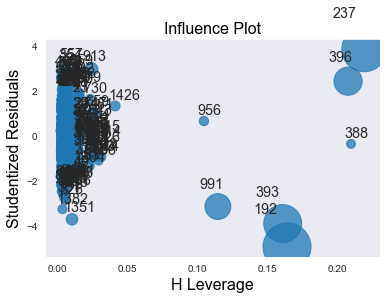

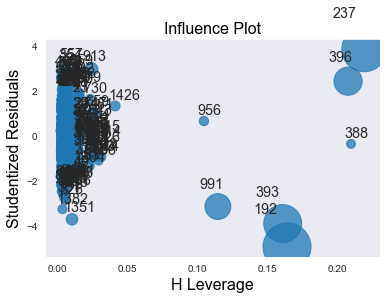

In [31]:
# influence plot (index based analysis)
sm.graphics.influence_plot(model_2)

In [32]:
# records deletion having index 49, 48, 46
df_new1 = df.drop(df.index[[237, 192, 393]], axis = 0)
df_new1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


#### Model 3 (Considering all features with 3 records removed)

In [33]:
# model 3 (after removal of 3 records)
model_3 = smf.ols('Price ~ Age_08_04 + KM + HP + Doors + cc + Gears + Weight', data = df_new1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1309.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:14   Log-Likelihood:                -12339.
No. Observations:                1433   AIC:                         2.469e+04
Df Residuals:                    1425   BIC:                         2.474e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7108.9525   1305.118     -5.447      0.000   -9669.112   -4548.793
Age_08_04   -122.7775      2.591    -47.384      0.000    -127.860    -117.695
KM            -0.0195      0.001    -16.206      0.000      -0.022      -0.017
HP            27.5427      2.602     10.587      0.000      22.439      32.646
Doors         -0.8947     39.634     -0.023      0.982     -78.642      76.853
cc            -0.0846      0.089     -0.954      0.340      -0.259       0.089
Gears        637.3800    195.369      3.262      0.001     254.139    1020.621
Weight        18.8270      0.857     21.979      0.000      17.147      20.507
==============================================================================
Omnibus:                      195.453   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1631.207
Skew:                          -0.337   Prob(JB):                         0.00
Kurtosis:                       8.183   Cond. No.                     2.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Model 3 is more acceptable than Model 2. Model 3 performance is slightly better than Model 2


    - The accuracy is coming out 86.5 % from 81.8 %
    
        [R-Squared]    |    [Adj R-Squared]    |     [p-values]     |     [Features]
    ------------------------------------------------------------------------------------
     0.818 (0.865)      0.817 (0.865)           0.000 (0.000)         Age + KM + HP + Weight 
                                                0.021 (0.982)         Doors
                                                0.000 (0.340)         cc
                                                
    Note: with () values are Model 3 and without () values are Model 2
    
* But still Doors and cc have high p-value. So next goal is to analyze the factors affecting on these variables (multi collinearity)

In [34]:
# model 4 (remove the features 'Doors' and 'cc')
model_4 = smf.ols('Price ~ Age_08_04 + KM + HP + Gears + Weight', data = df_new1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1834.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:14   Log-Likelihood:                -12340.
No. Observations:                1433   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.472e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6981.5926   1294.536     -5.393      0.000   -9520.990   -4442.195
Age_08_04   -122.7865      2.590    -47.406      0.000    -127.867    -117.706
KM            -0.0196      0.001    -16.406      0.000      -0.022      -0.017
HP            27.4133      2.582     10.616      0.000      22.348      32.479
Gears        639.1579    191.574      3.336      0.001     263.361    1014.955
Weight        18.5926      0.792     23.481      0.000      17.039      20.146
==============================================================================
Omnibus:                      189.235   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1544.606
Skew:                          -0.318   Prob(JB):                         0.00
Kurtosis:                       8.046   Cond. No.                     2.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* All the features p-values = 0.000 (After removing the Doors and cc)

* Accuracy is same as previous model.

* So, this is the best fit model (Model 4) among all the models (Model 1 + Model 2 + Model 3) 

## Partial Regression Plot

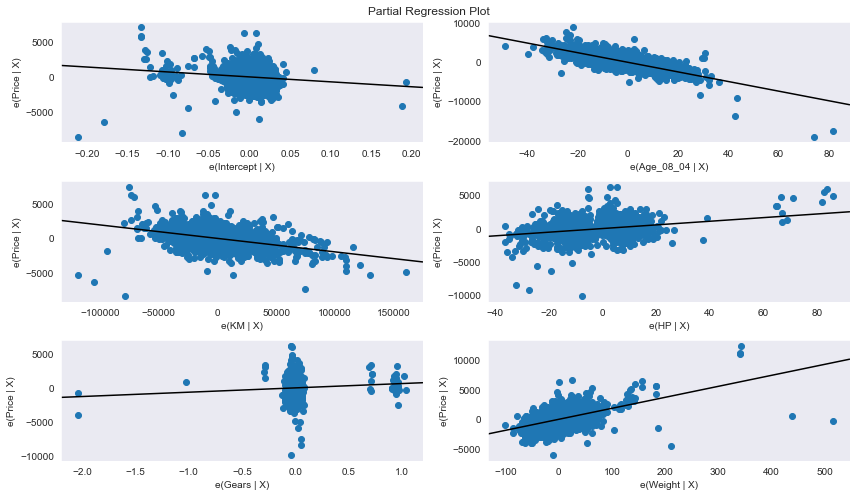

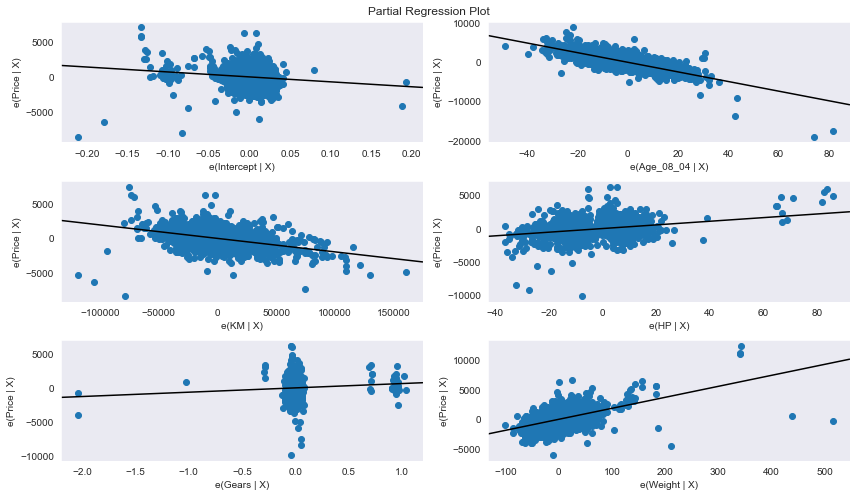

In [35]:
fig = plt.figure(figsize = (12,7))
sm.graphics.plot_partregress_grid(model_4, fig = fig)

* No straight line is found in all the above selected features.

#### regression plot (input features against predicting one)

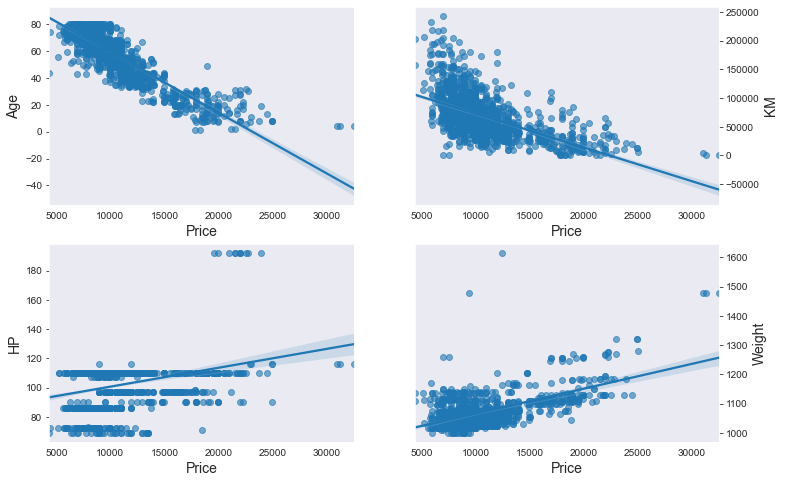

In [36]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age_08_04', data = df_new1, ax = axes[0,0], scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = df_new1, ax = axes[0,1], scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# HP Vs Price
sns.regplot(x = 'Price', y = 'HP', data = df_new1, ax = axes[1,0], scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('HP', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = df_new1, ax = axes[1,1], scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

## Residual Plots (fitted value vs residuals)

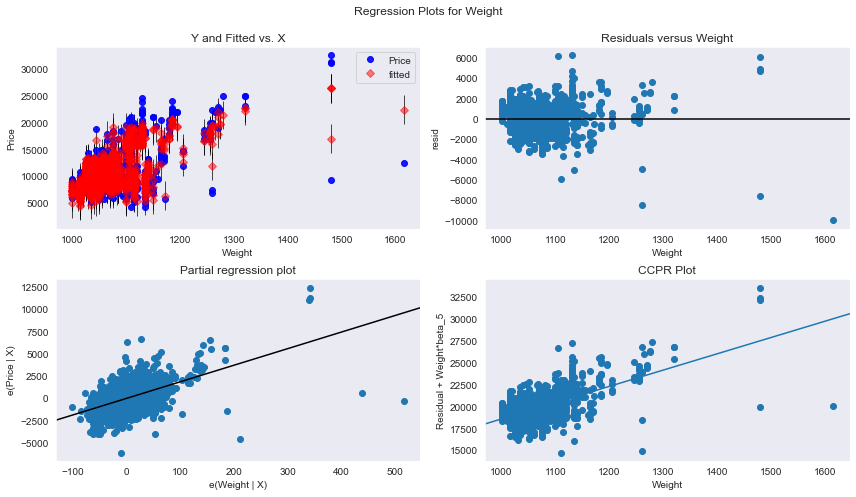

In [37]:
# scatter plot to visualize the relationship between the data
fig = plt.figure(figsize =(12,7))

fig = sm.graphics.plot_regress_exog(model_4, 'Weight', fig = fig)

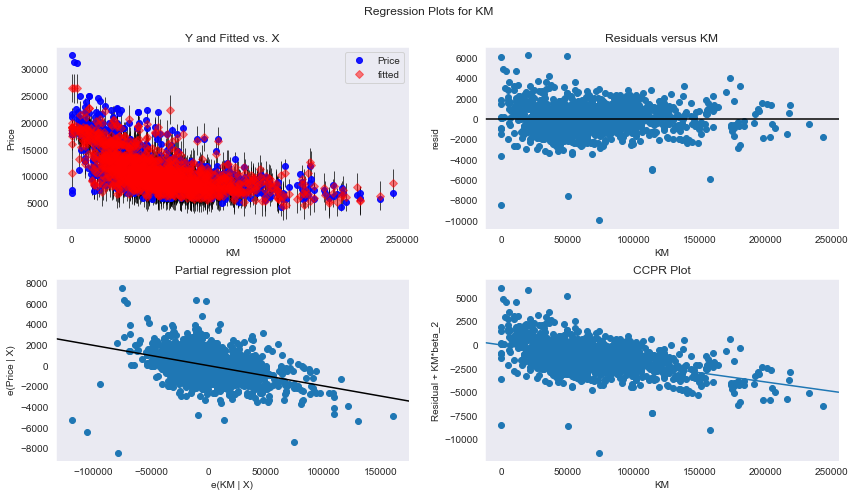

In [38]:
fig = plt.figure(figsize =(12,7))
fig = sm.graphics.plot_regress_exog(model_4, 'KM', fig = fig)

    - The residuals are normally distributed within the line
    - No U-shaped or V-shaped pattern is found
    
* Best fit model from (Model 1, Model 2, Model 3, Model 4) is Model 4
* Accuracy = 86.50 %
* Resolved the collinearity issue successfully by removing the independent unnecessary feature
* Resolved the outliers from features
* Improve the model accuracy by removing dublication entry and 3 records indexes which affect the performance of model


* Now trying it out with Training Set and Testing Set for more better results

## Building Model using data spliting (Train + Test)

In [39]:
# split the data into Training set (80%) and Testing set (20%)

from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df_new1, test_size = 0.2, random_state = 0)

In [40]:
# check the size of Training set and Testing set 
print('Training set size:', len(x_train))
print('Testing set size:', len(x_test))

Training set size: 1146
Testing set size: 287


#### Model 5 (training phase: considering all features excluding Administrations)

In [41]:
# Train the model with all features excluding Administrations
model_train = smf.ols('Price ~ Age_08_04 + KM + HP + Gears + Weight', data = x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1475.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:31   Log-Likelihood:                -9875.6
No. Observations:                1146   AIC:                         1.976e+04
Df Residuals:                    1140   BIC:                         1.979e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5821.0986   1449.963     -4.015      0.000   -8665.995   -2976.202
Age_08_04   -125.5443      2.887    -43.484      0.000    -131.209    -119.880
KM            -0.0194      0.001    -14.432      0.000      -0.022      -0.017
HP            24.5570      3.020      8.133      0.000      18.633      30.481
Gears        546.0587    228.209      2.393      0.017      98.303     993.815
Weight        18.3358      0.844     21.736      0.000      16.681      19.991
==============================================================================
Omnibus:                      182.702   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1506.960
Skew:                          -0.468   Prob(JB):                         0.00
Kurtosis:                       8.539   Cond. No.                     2.88e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# train data prediction
train_predict = model_train.predict(x_train)
train_predict.head()

870      9494.246401
611      7439.979597
514     10039.175362
1217     7529.076139
1247     7439.372673
dtype: float64

In [43]:
# train residuals values
train_residuals = train_predict - x_train.Price
train_residuals.head()

870    -355.753599
611    -510.020403
514    -460.824638
1217   -720.923861
1247    539.372673
dtype: float64

In [44]:
# RMSE value
train_rmse = np.sqrt(np.mean(train_residuals * train_residuals))
print(train_rmse)

1337.4242102173228


In [45]:
# test data prediction
test_predict = model_train.predict(x_test)
test_predict.head()

1062     4489.629714
414     10729.467605
344     14622.371045
1298     7691.931565
486     11849.828176
dtype: float64

In [46]:
# test residuals values
test_residuals = test_predict - x_test.Price
test_residuals.head()

1062   -2260.370286
414     -170.532395
344     1672.371045
1298     191.931565
486     1099.828176
dtype: float64

In [47]:
# RMSE value
test_rmse = np.sqrt(np.mean(test_residuals * test_residuals))
print(test_rmse)

1301.3483067575169


* Training model performance (Model_train)
            
      - Accuracy = 86.60 %
      - Training RMSE = 1337.42
      - Testing RMSE = 1301.34

## Final Model based on Training set and Testing set

#### Model 5 (Testing phase)

In [48]:
model_final_version = smf.ols('Price ~ Age_08_04 + KM + HP + Gears + Weight', data = x_test).fit()
model_final_version.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          4.51e-121
Time:                        12:33:32   Log-Likelihood:                -2457.7
No. Observations:                 287   AIC:                             4927.
Df Residuals:                     281   BIC:                             4949.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.163e+04   3237.447     -3.592      0.000    -1.8e+04   -5255.413
Age_08_04   -111.4430      6.106    -18.252      0.000    -123.462     -99.424
KM            -0.0209      0.003     -7.861      0.000      -0.026      -0.016
HP            35.6836      5.098      7.000      0.000      25.649      45.718
Gears        987.2522    349.100      2.828      0.005     300.068    1674.436
Weight        20.0331      2.382      8.408      0.000      15.343      24.723
==============================================================================
Omnibus:                       25.515   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.894
Skew:                           0.448   Prob(JB):                     1.20e-12
Kurtosis:                       4.946   Cond. No.                     3.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Final model summary:
    
      - Accuracy = 86.80 % 
      - p-values = 0.000 (all are below 0.05, so satisfied the condition for feature selection)
      - RMSE of model = 1304.31 (Error measures)